# Pneumonia Classification using CNNs
SAARANG ARORA

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

If Pneumonia is suspected, one of the primary diagnostic tools that are available are **Chest X-Rays**. Doctors will look for Lung Opacity, Consolidation, Air Bronchograms, Lobar or Segmental Distribution, Pleural Effusion, and Increased Lung Volume or Loss of Normal Lung Architecture. All these show up in X-Rays, but require a trained eye to notice all these issues, and even then sometimes a small issue might be overlooked. so training a CNN to recogonise these images as infected or not infected caan increase efficiency as well as point out symptoms that might be looked over.

Medical Diagnosis: In medical diagnostics, precision minimizes misdiagnoses, ensuring that patients receive appropriate treatment. At the same time, high recall ensures that critical conditions are not overlooked, ultimately contributing to better patient outcomes.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [4]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("../input"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix


['chest-xray-pneumonia']


In [5]:
mainDIR = os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray")
print(mainDIR)

['chest_xray', '__MACOSX', 'val', 'test', 'train']


In [6]:
train_folder= '../input/chest-xray-pneumonia/chest_xray/train/'
val_folder = '../input/chest-xray-pneumonia/chest_xray/val/'
test_folder = '../input/chest-xray-pneumonia/chest_xray/test/'

In [7]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-1177-0001.jpeg
pneumonia picture title: person875_bacteria_2798.jpeg


Text(0.5, 1.0, 'Pneumonia')

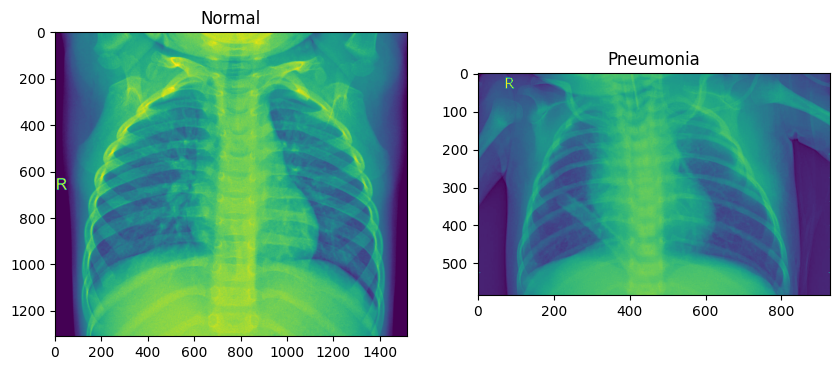

In [8]:
# #Normal pic 
# print(len(os.listdir(train_n)))
# rand_norm= np.random.randint(0,len(os.listdir(train_n)))
# norm_pic = os.listdir(train_n)[rand_norm]
# print('normal picture title: ',norm_pic)

# norm_pic_address = train_n+norm_pic

# #Pneumonia
# rand_p = np.random.randint(0,len(os.listdir(train_p)))

# sic_pic =  os.listdir(train_p)[rand_norm]
# sic_address = train_p+sic_pic
# print('pneumonia picture title:', sic_pic)

# # Load the images
# norm_load = Image.open(norm_pic_address)
# sic_load = Image.open(sic_address)

# #Let's plt these images
# f = plt.figure(figsize= (10,6))
# a1 = f.add_subplot(1,2,1)
# img_plot = plt.imshow(norm_load)
# a1.set_title('Normal')

# a2 = f.add_subplot(1, 2, 2)
# img_plot = plt.imshow(sic_load)
# a2.set_title('Pneumonia')


In [9]:
# # let's build the CNN model

# cnn = Sequential()

# #Convolution
# cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# #Pooling
# cnn.add(MaxPooling2D(pool_size = (2, 2)))

# # 2nd Convolution
# cnn.add(Conv2D(32, (3, 3), activation="relu"))

# # 2nd Pooling layer
# cnn.add(MaxPooling2D(pool_size = (2, 2)))

# # Flatten the layer
# cnn.add(Flatten())

# # Fully Connected Layers
# cnn.add(Dense(activation = 'relu', units = 128))
# cnn.add(Dense(activation = 'sigmoid', units = 1))

# # Compile the Neural network
# cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [10]:
# let's build the CNN model
from keras.metrics import Recall

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network - changed metrics to track recall
cnn.compile(optimizer = 'adam', 
           loss = 'binary_crossentropy', 
           metrics=[Recall()])  # Changed from 'accuracy' to Recall()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
num_of_test_samples = 600
batch_size = 32


In [12]:
#Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 15,
                         validation_data = validation_generator,
                         validation_steps = 624)


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 556ms/step - loss: 0.5043 - recall: 0.9405 - val_loss: 0.5934 - val_recall: 1.0000
Epoch 2/15


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5934 - val_recall: 1.0000
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 371ms/step - loss: 0.2384 - recall: 0.9478 - val_loss: 0.2990 - val_recall: 1.0000
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2990 - val_recall: 1.0000
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 368ms/step - loss: 0.1940 - recall: 0.9496 - val_loss: 0.5069 - val_recall: 1.0000
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_recall: 1.0000
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 369ms/step - loss: 0.1791 - recall: 0.9520 - val_loss: 0.8454 - val_recall: 1.0000
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.8454 - val_recall: 1.0000
Epoch 9/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 369ms/step - loss: 0.1940 - recall: 0.9537 - val_loss: 0.4

In [15]:
test_accu = cnn.evaluate(test_set,steps=624)

624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.3041 - recall: 0.9440   


In [16]:
print('The testing recall is :',test_accu[1]*100, '%')

The testing recall is : 94.35897469520569 %


In [17]:
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
# confusion_matrix(validation_generator.classes, y_pred)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step


In [18]:
max(y_pred)


0